# Import necessary libraries

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# Loading the trained model

In [3]:
model_path = '../saved_models/emotion_recognition_model.h5'
model = load_model(model_path)

# Emotion labels

In [5]:
emotion_labels = ['anger', 'contempt', 'disgust', 'fear', 'happy','neutral', 'sad', 'surprised']

# Set paths and parameters

In [7]:
image_dir = '../data/images/'
image_size = (48, 48)

# Function to preprocess an image

In [9]:
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, image_size)
    img = img / 255.0
    return img


# Load test images and true labels

In [11]:
test_images = []
true_labels = []
for folder in os.listdir(image_dir):
    folder_path = os.path.join(image_dir, folder)
    if not os.path.isdir(folder_path):
        continue

    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        if not img_file.endswith(('.jpg', '.png')):
            continue

        # Preprocess image and append to the test set
        try:
            img = preprocess_image(img_path)
            test_images.append(img)
            # Extract true label from filename (e.g., "anger.jpg" -> "anger")
            true_labels.append(img_file.split('.')[0].lower())
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

# Convert to NumPy arrays

In [13]:
test_images = np.array(test_images)
true_labels = np.array(true_labels)

# Predict using the trained model

In [15]:
predictions = model.predict(test_images)
predicted_labels = [emotion_labels[np.argmax(pred)] for pred in predictions]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


# Evaluate the model

In [17]:
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=emotion_labels))

Classification Report:
              precision    recall  f1-score   support

       anger       0.65      0.68      0.67        19
    contempt       0.60      0.63      0.62        19
     disgust       0.75      0.47      0.58        19
        fear       0.72      0.68      0.70        19
       happy       0.58      0.58      0.58        19
     neutral       0.60      0.79      0.68        19
         sad       0.67      0.63      0.65        19
   surprised       0.60      0.63      0.62        19

    accuracy                           0.64       152
   macro avg       0.65      0.64      0.64       152
weighted avg       0.65      0.64      0.64       152



# Calculate confusion matrix

In [20]:
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=emotion_labels)

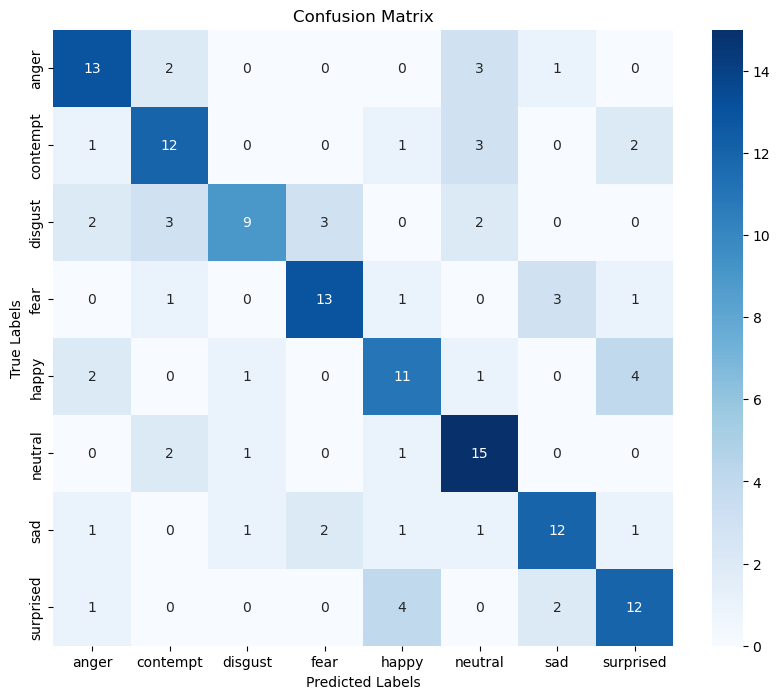

In [22]:
# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [24]:
# Overall accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.64
